##Start of EDA 2##

# Task 1: First pass - load data set and initial clean

##Start of Answer 1##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm




In [2]:
names = ('Season','Size','Speed','max_pH','min_O2','mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4','mean_PO4', 'mean_Chlor', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7')

## Change all na values to NA
df = pd.read_table('Analysis.txt' ,sep='\s+', names=names , na_values='XXXXXXX')

## Change data from objects to categorical
df.Season = pd.Categorical(df.Season, categories=['spring', 'summer', 'autumn', 'winter'], ordered=True)
df.Size = pd.Categorical(df.Size, categories=['small', 'medium', 'large'], ordered=True)
df.Speed = pd.Categorical(df.Speed, categories=['low', 'medium', 'high'], ordered=True)

## Check how many NA a specific row contains
df.isna().sum(axis=1).value_counts()

## remove any rows that contain more than 6 NA
df = df.loc[df.isna().sum(axis=1)<6].copy()


## df.isna().sum(axis=1).value_counts()

## Check which rows contain rest of NA
display(df.loc[df.isna().sum(axis=1) > 0])


display(df.describe())




,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
27,autumn,small,high,6.80,11.1,9.000,0.630,20.0,4.000,NaN,2.70,30.3,1.9,0.0,0.0,2.1,1.4,2.1
37,spring,small,high,8.00,NaN,1.450,0.810,10.0,2.500,3.000,0.30,75.8,0.0,0.0,0.0,0.0,0.0,0.0
47,winter,small,low,NaN,12.6,9.000,0.230,10.0,5.000,6.000,1.10,35.5,0.0,0.0,0.0,0.0,0.0,0.0
54,winter,small,high,6.60,10.8,NaN,3.245,10.0,1.000,6.500,NaN,24.3,0.0,0.0,0.0,0.0,0.0,0.0
55,spring,small,medium,5.60,11.8,NaN,2.220,5.0,1.000,1.000,NaN,82.7,0.0,0.0,0.0,0.0,0.0,0.0
56,autumn,small,medium,5.70,10.8,NaN,2.550,10.0,1.000,4.000,NaN,16.8,4.6,3.9,11.5,0.0,0.0,0.0
57,spring,small,high,6.60,9.5,NaN,1.320,20.0,1.000,6.000,NaN,46.8,0.0,0.0,28.8,0.0,0.0,0.0
58,summer,small,high,6.60,10.8,NaN,2.640,10.0,2.000,11.000,NaN,46.9,0.0,0.0,13.4,0.0,0.0,0.0
59,autumn,small,medium,6.60,11.3,NaN,4.170,10.0,1.000,6.000,NaN,47.1,0.0,0.0,0.0,0.0,1.2,0.0
60,spring,small,medium,6.50,10.4,NaN,5.970,10.0,2.000,14.000,NaN,66.9,0.0,0.0,0.0,0.0,0.0,0.0


,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
count,197.000000,197.000000,190.000000,198.000000,198.000000,198.000000,197.000000,188.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,8.019975,9.125482,43.636279,3.282389,501.295828,73.590596,138.510944,13.971197,16.996465,7.470707,4.334343,1.997475,5.115657,6.004545,2.487374
std,0.590169,2.394880,46.831311,3.776474,1962.545461,91.136436,129.017759,20.495920,21.421713,11.065461,6.976788,4.439205,7.511846,11.711053,5.181536
min,5.600000,1.500000,0.222000,0.050000,5.000000,1.000000,1.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,7.800000,10.981250,1.296000,38.333250,15.700000,43.500000,2.000000,1.525000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.060000,9.800000,32.730000,2.675000,103.166500,40.150000,104.000000,5.475000,6.950000,3.000000,1.550000,0.000000,2.000000,0.000000,1.000000
75%,8.400000,10.800000,57.823500,4.446250,226.950007,99.333250,214.000000,18.307500,24.800000,11.275000,4.975000,2.400000,7.500000,6.975000,2.400000
max,9.700000,13.400000,391.500000,45.650000,24064.000000,564.599980,771.599980,110.456000,89.800000,72.600000,42.800000,44.600000,44.400000,77.600000,31.600000


 After cleaning up the data we can see from the table that mean_Cl and mean_Chlor contain a substantial amount of NA and max_pH, min_02 and mean_P04 have one NA value each, we will address these NA values below

### Dealing with max_pH NA values

KDE (Kernel Density Estimation) estimates the pdf (probability density function) and from the plot below we can deduct the relative likelihood of a random number being close to the sample. The highest likelihood for a number being close to the sample is inline with 8, this means that 8 has the highest chance of being a random value chosen from the data set ie the most common value.

From the boxplot, we can see that the median value is roughly 8 as well and a few outliers are present on each side. In this case, it would be appropriate to replace any missing value with the mean or median as the mean is also relatively close to the median

count    197.000000
mean       8.019975
std        0.590169
min        5.600000
25%        7.700000
50%        8.060000
75%        8.400000
max        9.700000
Name: max_pH, dtype: float64

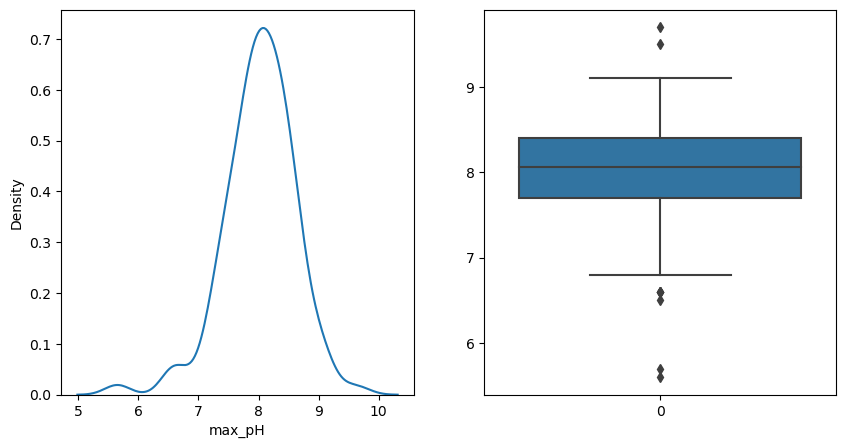

In [3]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.kdeplot(ax=ax1, data=df.max_pH)
sns.boxplot(ax=ax2, data=df.max_pH)

display(df["max_pH"].describe())

## Replacing missing pH values with the mean pH
df.max_pH.fillna(df.max_pH.mean(), inplace=True)

### Dealing with mean_Chlor NA values

Data on the histogram is clustered around the left side showing an uneven distribution so the mean would not be a good representative of the central location. The boxplot shows us a good decently sized distribution with a relatively high interquartile range. Using the median might be the best option as we can't remove these rows as it would cause us to lose too much data. We will use the median to replace all mean_Chlor NA values.

count    188.000000
mean      13.971197
std       20.495920
min        0.200000
25%        2.000000
50%        5.475000
75%       18.307500
max      110.456000
Name: mean_Chlor, dtype: float64

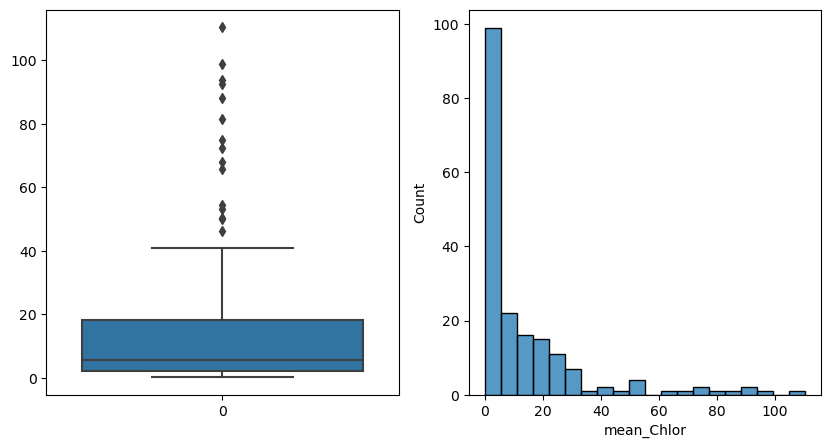

In [4]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax=ax1, data=df.mean_Chlor)
sns.histplot(ax=ax2, data=df.mean_Chlor)

display(df["mean_Chlor"].describe())

df.mean_Chlor.fillna(df.mean_Chlor.median(), inplace=True)

### Dealing with mean_Cl

Similarly to mean_Chlor, the values are clustered around the left side showing an uneven distribution. In this case, using the median would also be a better representation of the central location, so we will replace mean_Cl NA values with the median.

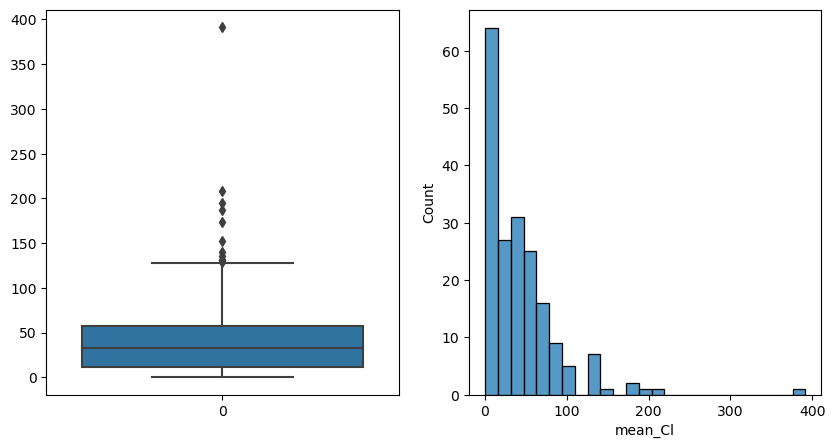

In [5]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax=ax1, data=df.mean_Cl)
sns.histplot(ax=ax2, data=df.mean_Cl)

df.mean_Cl.fillna(df.mean_Cl.median(), inplace=True)

### Dealing with mean_P04

Yet again values seem to be clustered around the left side suggesting an uneven distribution so the median would be a preferable replacement for any of the NA values

,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
37,spring,small,high,8.0,NaN,1.45,0.81,10.0,2.5,3.0,0.3,75.8,0.0,0.0,0.0,0.0,0.0,0.0


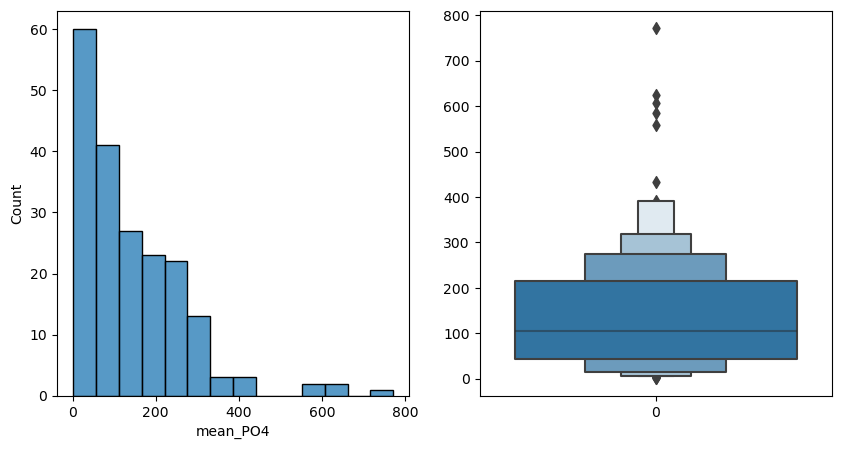

In [6]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(ax=ax1, data=df.mean_PO4)
sns.boxenplot(ax=ax2, data=df.mean_PO4)
 
df.mean_PO4.fillna(df.mean_PO4.median(), inplace=True)

## Check if there are any NA values left 
df.loc[df.isna().sum(axis=1) > 0]

### Dealing with min_O2

KDE (Kernel Density Estimation) estimates the pdf (probability density function) and from the plot below we can deduct the relative likelihood of a random number being close to the sample the highest likelihood looks to be just a bit over 10.

From the boxplot, we can see that the median value is also a bit under 10. In this case, it would be appropriate to replace any missing value with the median as it has a better indication of being closer to the sample.

9.8

,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7


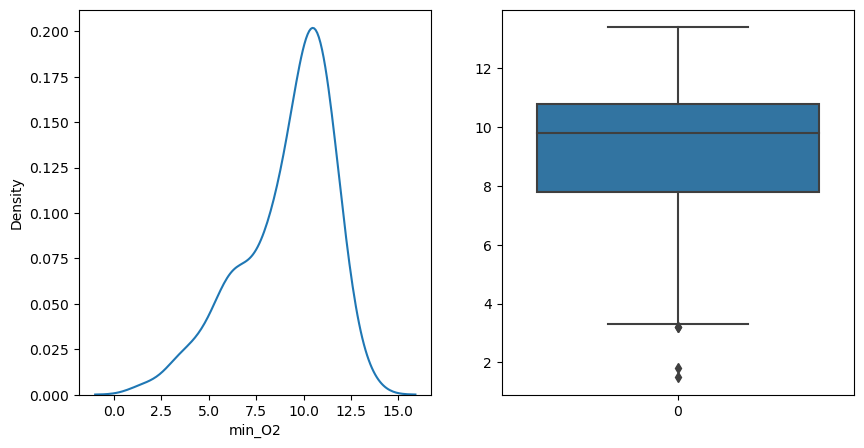

In [7]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.kdeplot(ax=ax1, data=df.min_O2)
sns.boxplot(ax=ax2, data=df.min_O2)

display(df.min_O2.median())

## replace min_O2 value with mean 
df.min_O2.fillna(df.min_O2.median(), inplace=True)

## Check for if we missed any NA values 
df.loc[df.isna().sum(axis=1) > 0]

### Choosing algea types as targets

From the table and plots below we can see that a1 has the highest standard deviation which means that there is more variability and spread in the data. A1 also has the highest max frequency and highest total_coutn as seen from the two tables below. We will use a1 as a target as it has the highest interquartile range and is more spread out. We will also use a4 as a target as it has the lowest frequency out of all the algae and the smallest interquartile range which should make the comparison interesting.

,a1,a2,a3,a4,a5,a6,a7
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,16.996465,7.470707,4.334343,1.997475,5.115657,6.004545,2.487374
std,21.421713,11.065461,6.976788,4.439205,7.511846,11.711053,5.181536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.525000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.950000,3.000000,1.550000,0.000000,2.000000,0.000000,1.000000
75%,24.800000,11.275000,4.975000,2.400000,7.500000,6.975000,2.400000
max,89.800000,72.600000,42.800000,44.600000,44.400000,77.600000,31.600000


a1    3365.3
a2    1479.2
a3     858.2
a4     395.5
a5    1012.9
a6    1188.9
a7     492.5
dtype: float64

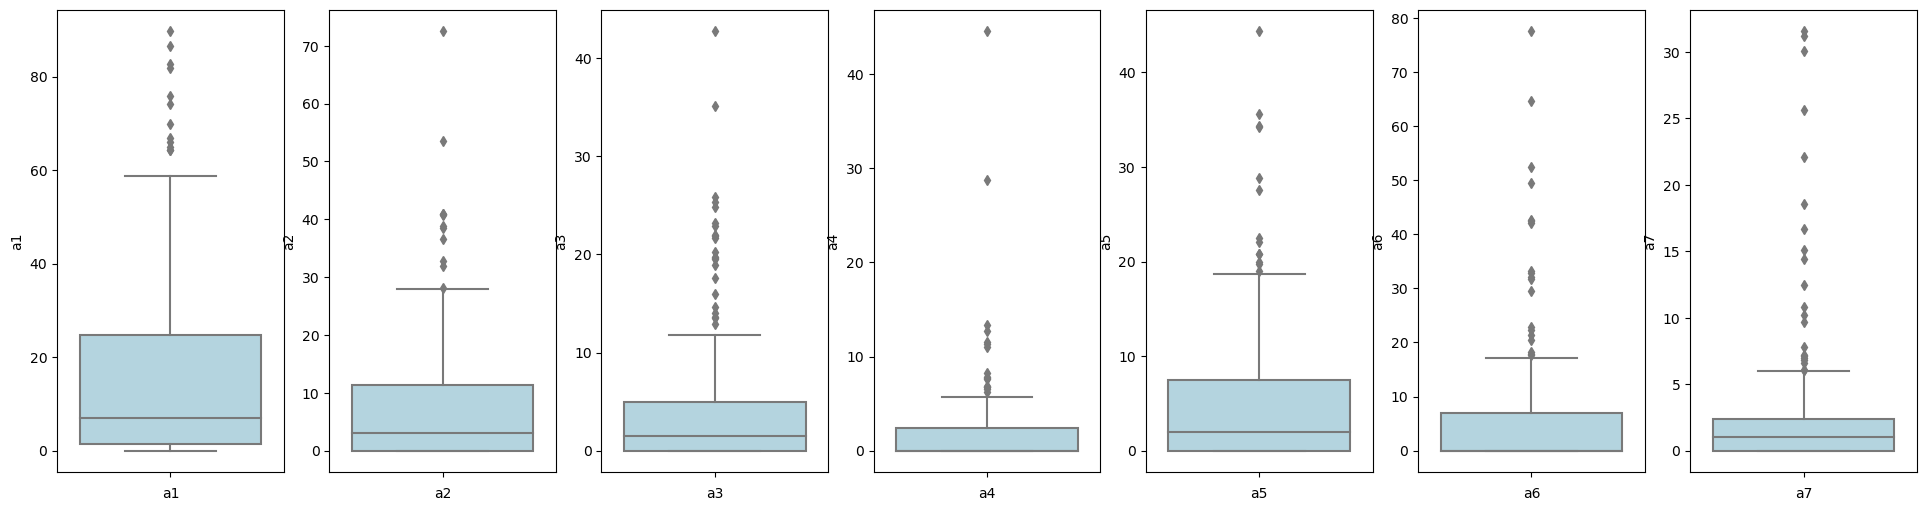

In [8]:
algae = ['a1','a2','a3','a4','a5','a6','a7']

fig, axs = plt.subplots(1, 7, figsize=(24,6))
for k, c in enumerate(algae):
    sns.boxplot(data=df, y=c, color="lightblue", ax=axs[k])
    axs[k].set_xlabel(c)

plt.show

display(df[algae].describe())
display(df[algae].sum(axis=0))

##End of Answer 1##

# Task 2: Second pass - individual features and target

##Start of Answer 2##

## Check for certain features that might be related to the target

### Season
- a1 From the violin plot we can see that there is no clear indication of the season affecting the algae count and all 4 seasons have similar median and interquartile ranges. There is nothing indicative of a relationship between the frequency of algae and the season so we won't look into this anymore. 

- a4 From the violin plot we see that the highest frequency of a4 is a lot lower than that of a1 and that spring has a significant outlier however the case is the same here, the median and interquartile range in a4 are similar between the seasons indicating that there is no relationship between season and algae frequency, so we won't be looking into this any further.

### Size
- a1 Looking at the boxplot we can see that frequency of algae in small rivers is higher than the others and could argue that medium river does have a slightly higher frequency than large. As there is a possible relation between the frequency of algae and the size of the river we should look into this further.

- a4 Similarly to a1 it looks like there is a relationship between the size of the river and the frequency of algae in smaller rivers seems to have a higher frequency and larger rivers tend to have a smaller frequency.

### Speed 

- a1 From the strip plot we can see that the algae frequency increases with the speed of the river and the distribution become more widespread. It looks as if there is a potential relationship between the speed and algae frequency and therefore should be investigated further.

- a4 Unlike a1 there seems to be very little difference in the distribution and frequency of a4 algae bar the handful of outliers, nothing in the strip plot points to a relationship of the river speed and algae frequency, therefore it should no longer be investigated.

<AxesSubplot:xlabel='Speed', ylabel='a4'>

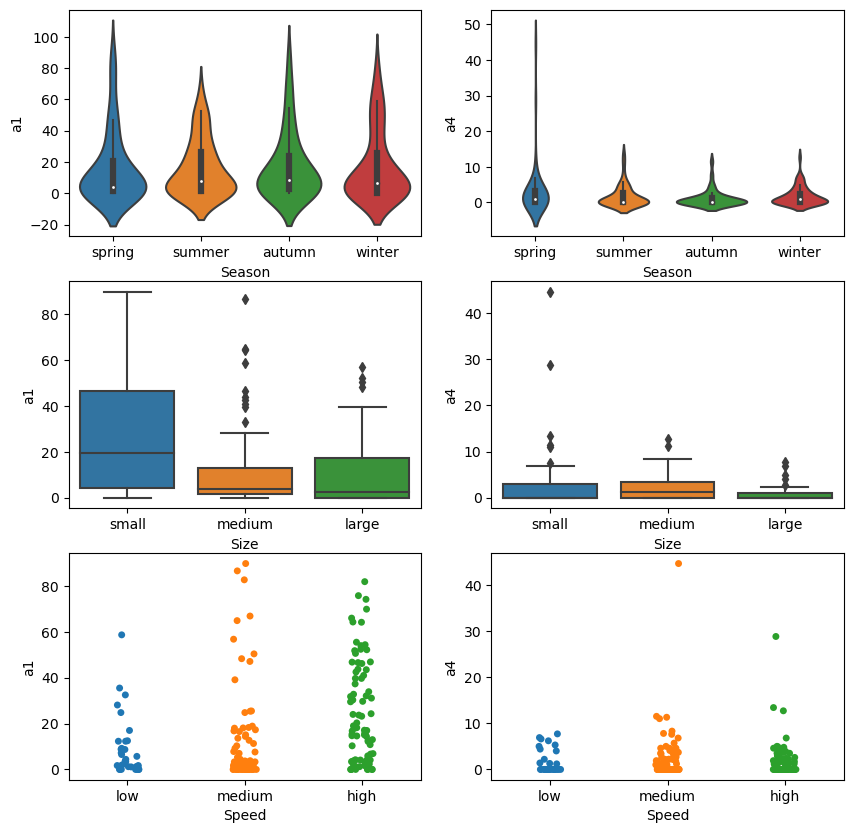

In [9]:
## Check season 
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.violinplot(ax=axes[0,0], x=df.Season , y=df.a1 )
sns.violinplot(ax=axes[0,1], x=df.Season , y=df.a4 )  
    
## Check size 
sns.boxplot(ax=axes[1,0], x=df.Size , y=df.a1)
sns.boxplot(ax=axes[1,1], x=df.Size , y=df.a4)

## Check speed 
sns.stripplot(ax=axes[2,0] ,data=df , x="Speed" , y="a1")
sns.stripplot(ax=axes[2,1] ,data=df , x="Speed" , y="a4")

## max_pH, min_O2, mean_Cl, mean_NO3, mean_NH4, mean_oPO4, mean_PO4 and mean_Chlor

Comparing a1 to a4 we can see that a1 has a much higher frequency of algae when compared to a4 meaning that a1 could be more ressiliant to certain chemicals.We will look into these further below.

<AxesSubplot:xlabel='mean_Chlor', ylabel='a4'>

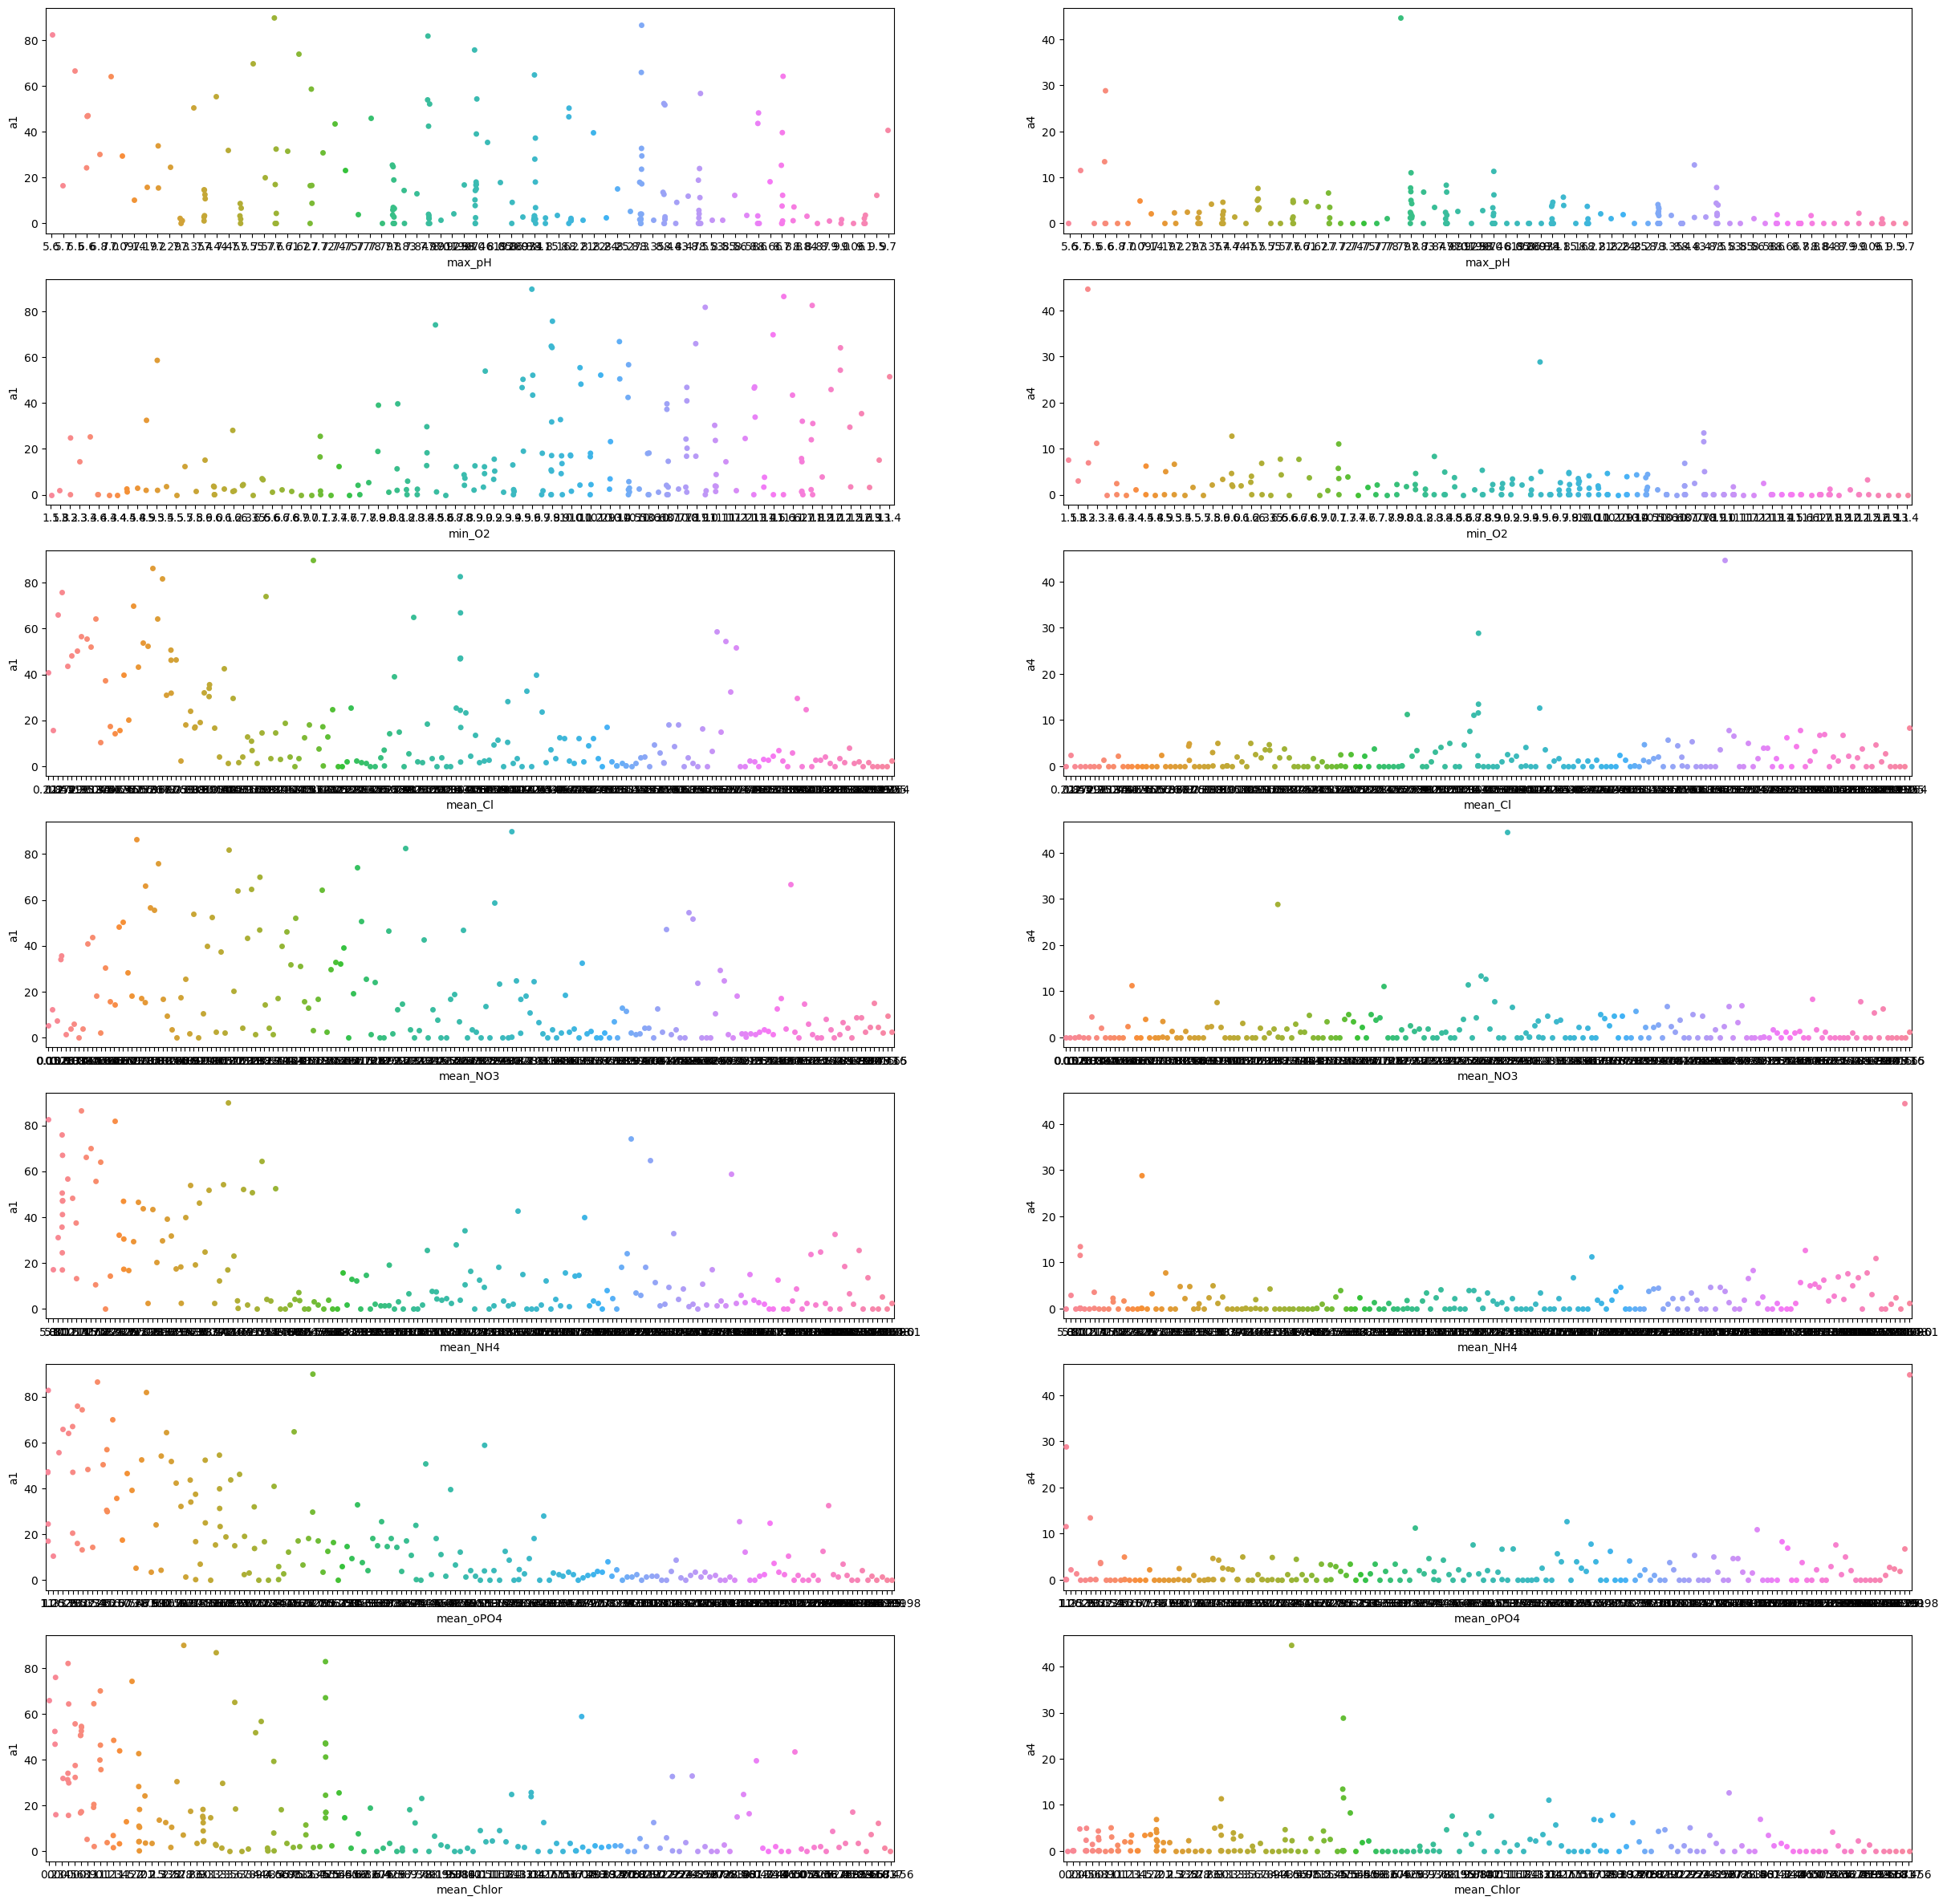

In [20]:
fig, axes = plt.subplots(7, 2, figsize=(30, 30))
## a1
sns.stripplot(ax=axes[0,0], x=df.max_pH, y=df.a1)
sns.stripplot(ax=axes[1,0], x=df.min_O2, y=df.a1)
sns.stripplot(ax=axes[2,0], x=df.mean_Cl, y=df.a1)
sns.stripplot(ax=axes[3,0], x=df.mean_NO3, y=df.a1)
sns.stripplot(ax=axes[4,0], x=df.mean_NH4, y=df.a1)
sns.stripplot(ax=axes[5,0], x=df.mean_oPO4, y=df.a1)
sns.stripplot(ax=axes[6,0], x=df.mean_Chlor, y=df.a1)

## a4
sns.stripplot(ax=axes[0,1], x=df.max_pH, y=df.a4)
sns.stripplot(ax=axes[1,1], x=df.min_O2, y=df.a4)
sns.stripplot(ax=axes[2,1], x=df.mean_Cl, y=df.a4)
sns.stripplot(ax=axes[3,1], x=df.mean_NO3, y=df.a4)
sns.stripplot(ax=axes[4,1], x=df.mean_NH4, y=df.a4)
sns.stripplot(ax=axes[5,1], x=df.mean_oPO4, y=df.a4)
sns.stripplot(ax=axes[6,1], x=df.mean_Chlor, y=df.a4)

##End of Answer 2##

## Task 3: Third pass - relationships between features and target

##Start of Answer 3##

## Using Spearman’s Rank Coefficient to Identify addiontal feature relationships with target a1

From Spearman’s heatmap, we can see a strong correlation of a1 with mean_PO4, mean_oPO4, mean_Cl and mean_Chlor. a4 also has a mid-level of correlation with min_02.

,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4
max_pH,1.000000,-0.148329,0.152562,-0.145182,0.026160,0.290245,0.213668,0.367930,-0.247787,0.477671,0.147193,-0.291257
min_O2,-0.148329,1.000000,-0.389757,0.057157,-0.345821,-0.455278,-0.514759,-0.206070,0.281304,-0.183623,-0.301472,-0.392700
mean_Cl,0.152562,-0.389757,1.000000,0.524604,0.562692,0.633095,0.678445,0.551625,-0.524848,0.333565,0.079313,0.212681
mean_NO3,-0.145182,0.057157,0.524604,1.000000,0.425010,0.432303,0.447496,0.341653,-0.382403,0.126763,-0.011824,0.045360
mean_NH4,0.026160,-0.345821,0.562692,0.425010,1.000000,0.603157,0.644626,0.384227,-0.449194,0.185324,-0.028612,0.301659
mean_oPO4,0.290245,-0.455278,0.633095,0.432303,0.603157,1.000000,0.910464,0.483516,-0.671019,0.391014,0.179297,0.150506
mean_PO4,0.213668,-0.514759,0.678445,0.447496,0.644626,0.910464,1.000000,0.523274,-0.655494,0.363712,0.191543,0.215420
mean_Chlor,0.367930,-0.206070,0.551625,0.341653,0.384227,0.483516,0.523274,1.000000,-0.520324,0.436144,-0.029545,0.022222
a1,-0.247787,0.281304,-0.524848,-0.382403,-0.449194,-0.671019,-0.655494,-0.520324,1.000000,-0.277781,-0.138834,-0.061906
a2,0.477671,-0.183623,0.333565,0.126763,0.185324,0.391014,0.363712,0.436144,-0.277781,1.000000,0.263219,-0.271549


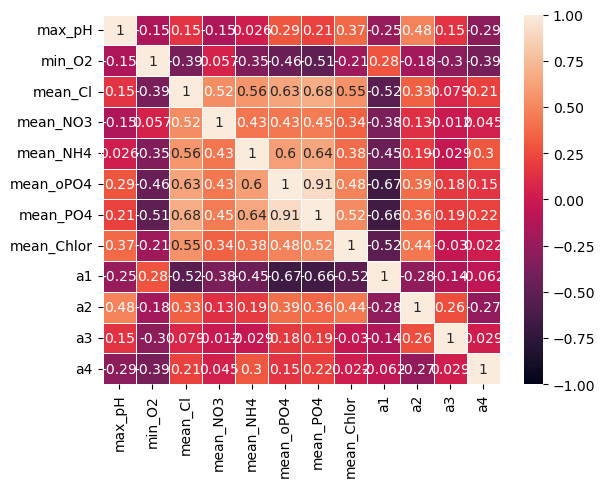

In [11]:
columns = df.columns[:15]
SpearCorr = df[columns].corr(method='spearman')

ax = sns.heatmap(SpearCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5)
SpearCorr

## Using Phiks Correlation Coefficient to Identify additional feature relationships with target a1 (includes categorical value)

From  Phiks correlation heatmap we can see a correlation of a1 with Size, Speed and max_pH. a4 has a strong corelation with mean_NH4, mean_oPO4, mean_PO4 and max_pH, however very little or none with the size and speed.


interval columns not set, guessing: ['max_pH', 'min_O2', 'mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4', 'mean_PO4', 'mean_Chlor', 'a1', 'a2', 'a3', 'a4']


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4
Season,1.000000,0.000000,0.000000,0.000000,0.347767,0.000000,0.000000,0.034202,0.000000,0.113527,0.016717,0.000000,0.235722,0.180030,0.000000
Size,0.000000,1.000000,0.620101,0.655207,0.271610,0.295083,0.182410,0.000000,0.000000,0.521392,0.219744,0.353390,0.301927,0.288757,0.000000
Speed,0.000000,0.620101,1.000000,0.445096,0.438738,0.329001,0.000000,0.101348,0.483298,0.591471,0.488537,0.369374,0.248468,0.064351,0.054338
max_pH,0.000000,0.655207,0.445096,1.000000,0.129955,0.000000,0.000000,0.000000,0.000000,0.128623,0.441149,0.372031,0.231549,0.000000,0.493595
min_O2,0.347767,0.271610,0.438738,0.129955,1.000000,0.357181,0.000000,0.416979,0.492317,0.536612,0.337781,0.000000,0.118330,0.225246,0.293585
mean_Cl,0.000000,0.295083,0.329001,0.000000,0.357181,1.000000,0.247831,0.096017,0.450261,0.479983,0.244433,0.000000,0.000000,0.000000,0.000000
mean_NO3,0.000000,0.182410,0.000000,0.000000,0.000000,0.247831,1.000000,0.642789,0.158463,0.260486,0.376033,0.000000,0.000000,0.000000,0.000000
mean_NH4,0.034202,0.000000,0.101348,0.000000,0.416979,0.096017,0.642789,1.000000,0.734681,0.776305,0.201509,0.000000,0.000000,0.000000,0.621800
mean_oPO4,0.000000,0.000000,0.483298,0.000000,0.492317,0.450261,0.158463,0.734681,1.000000,0.954537,0.000000,0.000000,0.115687,0.000000,0.693140
mean_PO4,0.113527,0.521392,0.591471,0.128623,0.536612,0.479983,0.260486,0.776305,0.954537,1.000000,0.241126,0.212924,0.000000,0.415022,0.700802


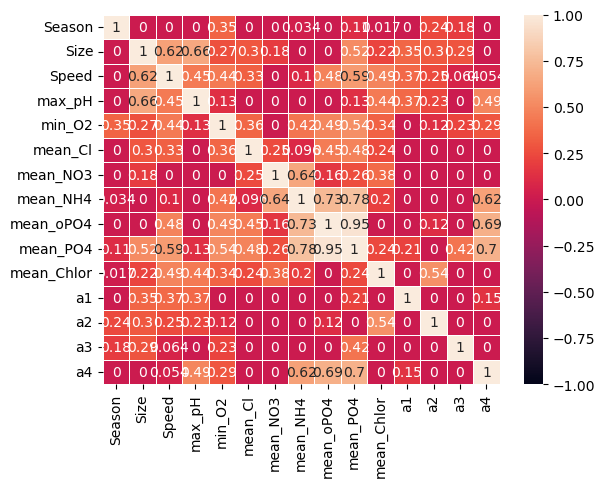

In [12]:
import phik
columns = df.columns[:15]
PhikCorr = df[columns].phik_matrix()

ax = sns.heatmap(PhikCorr, annot=True, vmin=-1 , vmax=1,  linewidths=0.5)

PhikCorr

## Using Pearson’s Correlation Coefficient to Identify additional feature relationships with target a1

From  Pearson’s correlation heatmap, we can see yet again a correlation of a1 with mean_Cl, mean_oPO4 and mean_PO4. a4 once again shows its strongest correlation with min_O2 , mean_oPO4 and mean_PO4.

,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4
max_pH,1.000000,-0.167995,0.133115,-0.130762,-0.093521,0.158769,0.180692,0.391434,-0.268539,0.326085,0.030987,-0.248611
min_O2,-0.167995,1.000000,-0.278732,0.098377,-0.087805,-0.416551,-0.487726,-0.166781,0.283898,-0.099356,-0.251554,-0.315138
mean_Cl,0.133115,-0.278732,1.000000,0.225041,0.074075,0.392307,0.456521,0.150828,-0.360781,0.089498,0.094297,0.120459
mean_NO3,-0.130762,0.098377,0.225041,1.000000,0.721444,0.144588,0.169314,0.142910,-0.241211,0.023688,-0.076214,-0.025783
mean_NH4,-0.093521,-0.087805,0.074075,0.721444,1.000000,0.227237,0.208444,0.093751,-0.132656,-0.029683,-0.101440,0.228229
mean_oPO4,0.158769,-0.416551,0.392307,0.144588,0.227237,1.000000,0.913878,0.129416,-0.417358,0.147690,0.033629,0.295746
mean_PO4,0.180692,-0.487726,0.456521,0.169314,0.208444,0.913878,1.000000,0.267589,-0.487301,0.162470,0.065873,0.304626
mean_Chlor,0.391434,-0.166781,0.150828,0.142910,0.093751,0.129416,0.267589,1.000000,-0.283800,0.381923,-0.049759,-0.083646
a1,-0.268539,0.283898,-0.360781,-0.241211,-0.132656,-0.417358,-0.487301,-0.283800,1.000000,-0.292520,-0.146950,-0.038924
a2,0.326085,-0.099356,0.089498,0.023688,-0.029683,0.147690,0.162470,0.381923,-0.292520,1.000000,0.030311,-0.171682


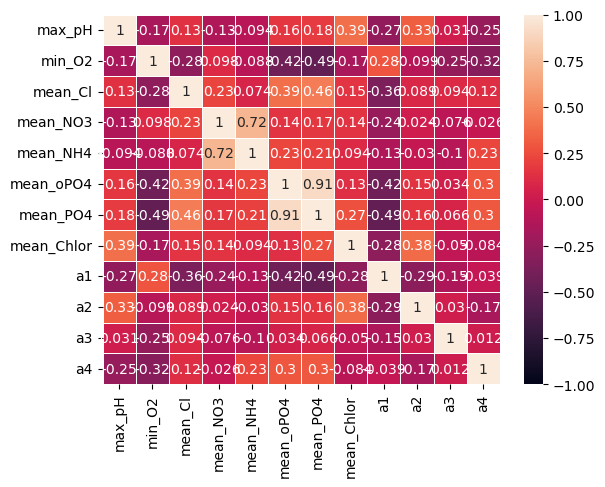

In [13]:
columns = df.columns[:15]
PearsonCorr = df[columns].corr()

ax = sns.heatmap(PearsonCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5)
PearsonCorr

## Finalised list from 3 different corealation coefficients : 

### a1
Numerical : mean_PO4 , mean_oPO4, mean_Cl,mean_Chlor and max_pH
Categorical : Size and Speed

### a4 
Numerical : mean_NH4, mean_oPO4 and mean_PO4 , max_pH and min_O2

## Analysing numerical variables 

### A1
From the mean_Cl, mean_PO4, mean_oPO4 and mean_Chlor scatterplots we see that most of the data is clustered on the left side both high and low and as we move more right it tends to move lower. This means that the lower values of those chemicals can lead to a higher frequency of algae and as you increase those chemical values then the frequency of algae decreases. As for the max_pH scatterplot we can see that most of the data is clustered between ~7 and ~9 with a few outliers, this means that algae is most likely to be presnet in the river if the pH level is between those two pH levels. A pH level of below 7 or above 9 would be recommended to decrease the frequency of algae.


### A4
We can see straight away that the frequency of the a4 algae is much lower. This would suggest that this algae type is rare. This can be best seen on the scatterplot of max_pH and comparing it to the one of a1 to see the difference of frequency at the same ph_levels. Looking at the  pO4 and oPO4 scatterplots for a4 it seems like the algae can withstand a higher amount of these checmicals than a1, you can see this by the higher frequencies as the chemical amount increases. This algae also has a much lower min_O2 level than a1 which means it has a better chance of survival in waters with smaller amounts of oxygen(harsher environment) however mean_cl and mean_Chlor scatterplots also show that algae a4 has trouble with thriving in rivers with those chemicals as the count and frequency is substatntially lower than that of a1.

<AxesSubplot:xlabel='min_O2', ylabel='a4'>

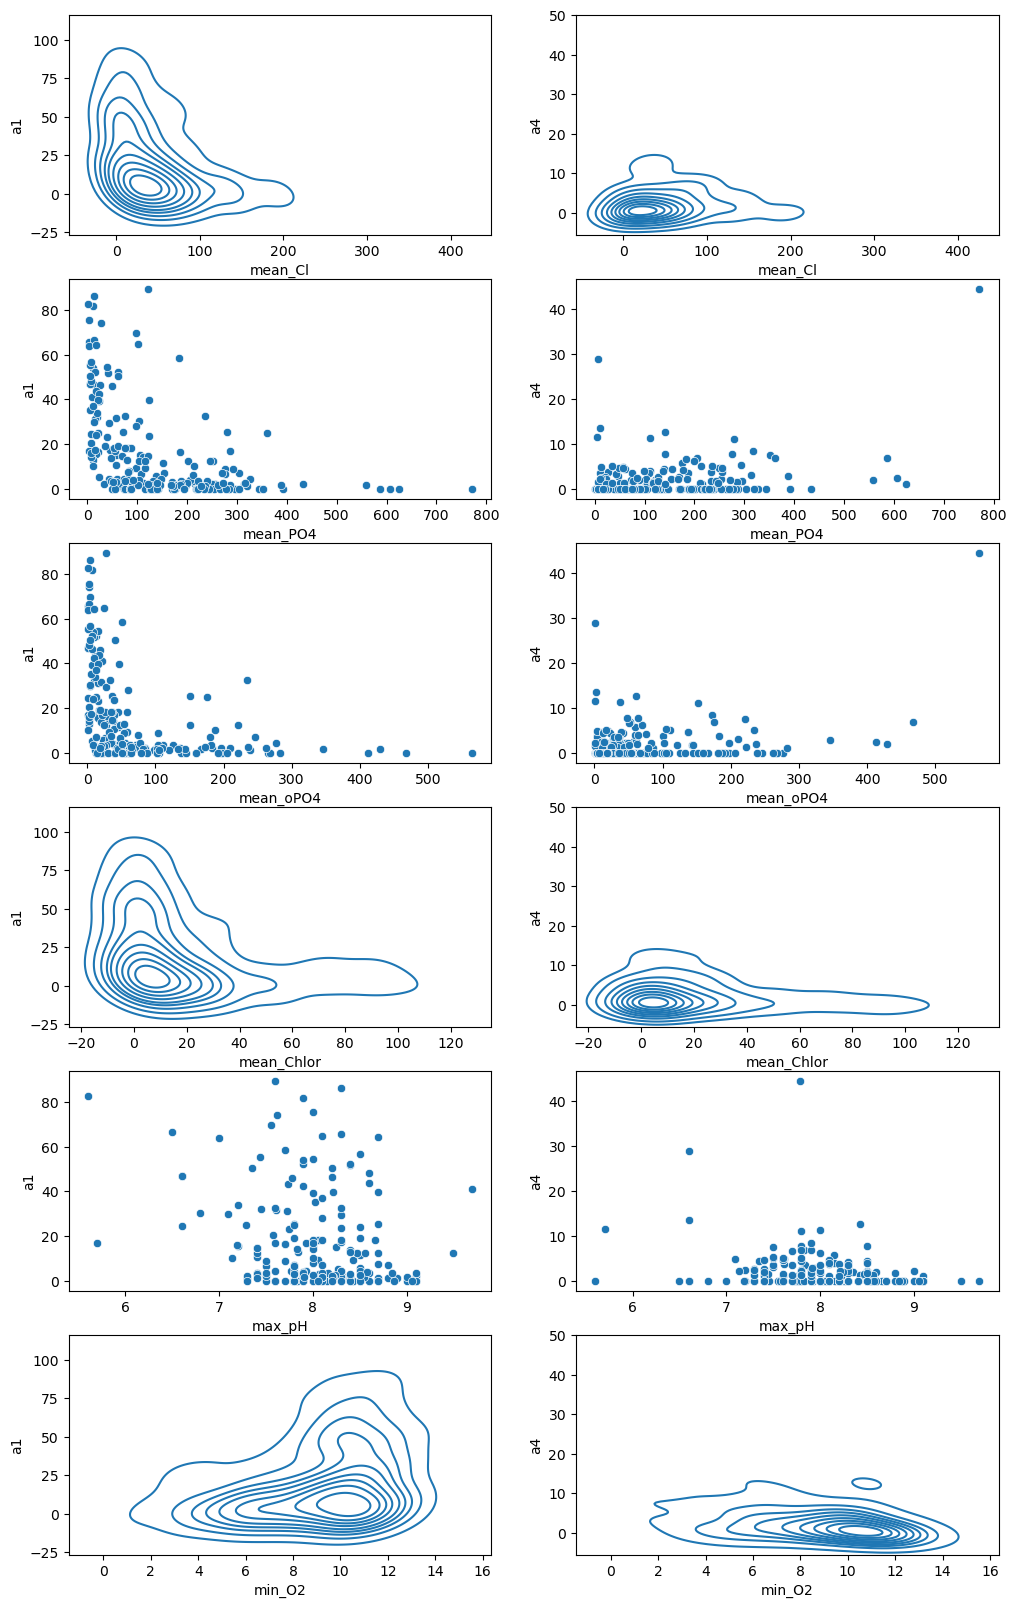

In [14]:
fig, axes = plt.subplots(6 , 2, figsize=(12, 20))

sns.kdeplot(ax=axes[0, 0], x=df.mean_Cl, y=df.a1)
sns.kdeplot(ax=axes[0, 1], x=df.mean_Cl, y=df.a4,)

sns.scatterplot(ax=axes[1, 0], x=df.mean_PO4, y=df.a1)
sns.scatterplot(ax=axes[1, 1], x=df.mean_PO4, y=df.a4)

sns.scatterplot(ax=axes[2, 0], x=df.mean_oPO4, y=df.a1)
sns.scatterplot(ax=axes[2, 1], x=df.mean_oPO4, y=df.a4)

sns.kdeplot(ax=axes[3, 0], x=df.mean_Chlor, y=df.a1)
sns.kdeplot(ax=axes[3, 1], x=df.mean_Chlor, y=df.a4)

sns.scatterplot(ax=axes[4, 0], x=df.max_pH, y=df.a1)
sns.scatterplot(ax=axes[4, 1], x=df.max_pH, y=df.a4)

sns.kdeplot(ax=axes[5, 0], x=df.min_O2, y=df.a1)
sns.kdeplot(ax=axes[5, 1], x=df.min_O2, y=df.a4)

## Analysing categorical variables 

From the Speed violin plot, we can see that at lower speeds there is a higher probability of having a low frequency of algae when comparing it to medium and high speeds. 
Medium speed has a lower probability of having a low frequency of algae when compared to low speed however at the same time it has a higher probability of having a higher frequency of algae. 
High speed has the lowest probability of having a small number of algae however it also has the highest probability of having a high frequency this is especially obvious as its interquartile range is significantly bigger (more spread out data) than low and medium speeds and its median also looks to be double that of low and medium speeds.
Slower rivers would have a higher chance of a smaller algae frequency and as the speeds increase the probability of having low-frequency decreases and the probability of higher frequencies increases.


The small size has a smaller probability of having a lower frequency of algae however it also has a higher probability of higher algae frequency. Medium-sized rivers have a higher chance of having a lower algae frequency when compared to small rivers however the probability of it having a higher algae frequency is lower than that of small rivers. It's worth noting that medium-sized rivers also have a smaller interquartile range than small rivers meaning its data is clustered closer than large. Large rivers have a similar chance as medium rivers of having a lower algae frequency however the chances of having a higher algae frequency are lower.

Large rivers have the highest probability of having a small algae frequency and as the size of the river gets smaller the probability of having a low algae frequency decreases and the probability of having a high algae frequency increases.

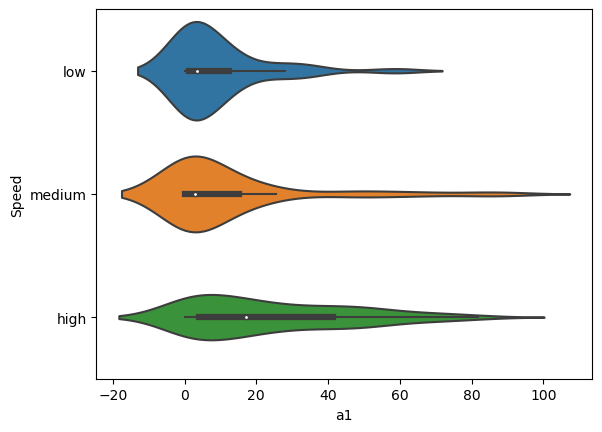

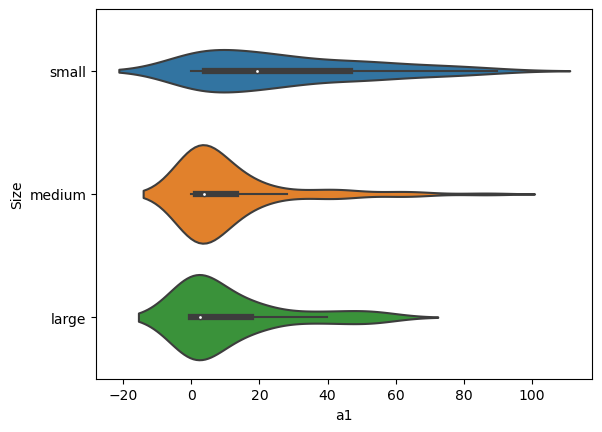

In [15]:
sns.violinplot( x=df.a1, y=df.Speed, s=5 ,)
plt.show()

sns.violinplot( x=df.a1, y=df.Size, s=5)
plt.show()

##End of Answer 3##

## Conclusion

### A1

From the findings above we can conclude that :
- River speed does affect this alga. The probability of this alga being present is relatively equal among the 3 speeds, however, the faster the speed of the river is the more likely it is that this alga will develop with higher frequencies.

- River size also affects algae, similarly enough to speed the possibility of algae developing is relatively similar across all 3 sizes however small rivers have a higher probability of having higher frequencies while larger rivers have a higher probability of lower frequencies.

- Small high-speed rivers have the highest chance of developing algae with a high frequency, and large slow rivers have the least chance of having a high algae frequency.

- This alga can withstand a small number of chemicals, however, once PO4, oPO4, Cl or Chlor is added the frequency of this algae decreases quite significantly. It was also noted that this alga thrives in a river with a ph level between 7 and 9.

- Rivers with a high trace of any of the chemicals mentioned above or very acidic or basic pH levels would have a very low frequency of algae.

One could describe this as a highly spreading algae with a quick treatment

### A4
- It was surprising that neither the river speed nor size affected this alga perhaps this is due to the rarity of this algae as it was only ever seen in lower frequencies.

- This alga could withstand a higher value of PO4 and oPO4 chemicals as the frequency didn't drop as dramatically as these chemicals increased, however, Cl and Chlor still caused the algae frequency to decrease as they increased.

- This algae could thrive in rivers of all speeds and sizes that contained oPO4 and PO4. It would take Cl, Chlor, and very acidic or basic pH level to remove this alga.

- This algae could be seen as a rare mutated variant(due to its low frequency) that grew immune to the speed and size of rivers and the oPO4 and pO4 chemicals. The fact that this alga can survive on lower amounts of oxygen than a2 could also point to it being a mutation.

## General
It was very surprising that the seasons had no correlation to the frequency of algae as one would think it would thrive in warm climates (summer) with longer exposure to light (summer), however this was not the case at all and very little to no difference was seen between all 4 seasons



##End of EDA 2##